**Sidratul Tanzila Tasmi
<br>190041138**

#Task 1

Initially necessary libraries were imported so we can complete all the lab tasks. There are two signals used in the lab, which are S(the input signal) and H(impulse response). The H is necessary to understand how the system will react when an input S will be put into the system, whichh is the essence of Convolution.

In [ ]:
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
S= [ 1,9,0,0,4,1,1,3,8]
H= [2,0,2,3]

In [ ]:
def output(n, signal, ll):
  plt.stem(n, signal, label=ll)
  plt.title(ll)
  plt.show()

A user defined output function is made here so we can call it plotting the input signal, output signal due to convolution as well as the impulse response.

In [ ]:
convolve=nm.convolve(S,H, 'full')

This is the built in function for taking convolution. The mode here is taken 'full' which is the default mode for convolution under the numpy. It returns the convolution at each point of the overlap with the total length of (S+H-1) which would also be used for plotting the input and output side of the algorithm.

In [ ]:
convolve

array([ 2, 18,  2, 21, 35,  2, 10, 20, 21,  9, 25, 24])

In [ ]:
n1=nm.arange(0, len(convolve),1)
n2=nm.arange(0, len(S),1)
n3=nm.arange(0, len(H),1)

<ipython-input-3-be7a03d63f1a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, signal, label=ll)


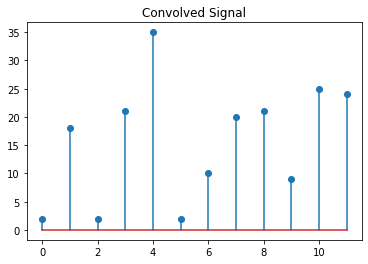

<ipython-input-3-be7a03d63f1a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, signal, label=ll)


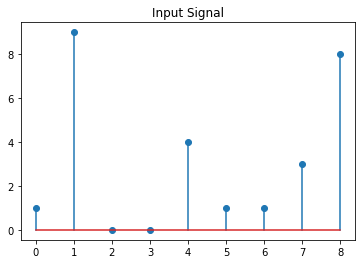

<ipython-input-3-be7a03d63f1a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, signal, label=ll)


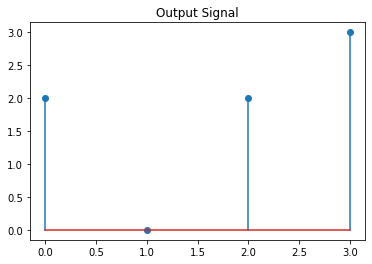

In [ ]:
output(n1, convolve,'Convolved Signal')
output(n2, S, 'Input Signal')
output(n3, H, 'Output Signal')

#Task 2

Input Side Algorithm

Task Explanation:This is the input side algorithm for the convolution. The input side algorithm produce (S+H-1) number of outpit signals which is stored in len3 variable. It decomposes the input, pass the component to the system and synthesizes the output. In the double loop, we have iterated each samples in the impulse response and multiplied with all the samples of the input. The position of the index where it would be multiplied was also considered. Then all the multiplied products in the same index was added. NB: Index values were iterated through len3, which is for each output samples.

In [ ]:
def InputSideAlgorithm(S,H):
  len1=len(S)
  len2=len(H)
  len3=len1+len2-1
  result=nm.zeros(len3)
  for i in range(len2):
    for j in range(len1):
      result[i+j]+=H[i]*S[j]

  return result



In [ ]:
InputSideAlgorithm(S,H)

array([ 2., 18.,  2., 21., 35.,  2., 10., 20., 21.,  9., 25., 24.])

#Task 3

Output Side Algorithm

Task Explanation: In this algorithm, instead of looping through the impulse and input and filling the output array, we have iterated through the output array and fill it in. Here the impulse response are flipped and then we have performed cumulative sum operation for each index with the input array.The if condition is placed so that our index dont go out of bound for the output array(result).

In [ ]:
def Outputsidealgorithm(S,H):
  len1=len(S)
  len2=len(H)
  len3=len1+len2-1
  result=nm.zeros(len3)
  for i in range(0,len3):
    for j in range(0,len2):
      if(i-j>=0) and (i-j<len1):
        result[i]+=(S[i-j]* H[j])

  return result

Outputsidealgorithm(S,H)


array([ 2., 18.,  2., 21., 35.,  2., 10., 20., 21.,  9., 25., 24.])

#Task 4

The input side algorithm, output side and the built in convolve function of the numpy have given the same output, so my algorithm works correctly.

In [ ]:
print(f'Using Built in np.convole: {nm.convolve(S,H,"full")}')
print(f'Using Built in np.convole: {InputSideAlgorithm(S,H)}')
print(f'Using Built in np.convole: {Outputsidealgorithm(S,H)}')

Using Built in np.convole: [ 2 18  2 21 35  2 10 20 21  9 25 24]
Using Built in np.convole: [ 2. 18.  2. 21. 35.  2. 10. 20. 21.  9. 25. 24.]
Using Built in np.convole: [ 2. 18.  2. 21. 35.  2. 10. 20. 21.  9. 25. 24.]


#Task 5

Task Explanation:
Initially as instructed, we have constructed the two waves, wave and ramp. Then using the convolve function, the combination of the two signals were considered. After that we put the newly formed signal into the low pass filter function. A low pass filter only allow the lower frequency signals to be taken and not the higher frequency ones. So, if we pass it to the low pass signal, it only accepts the ramp signal and shows it as output.

<ipython-input-22-cb1957ae4abc>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(wave)


<StemContainer object of 3 artists>

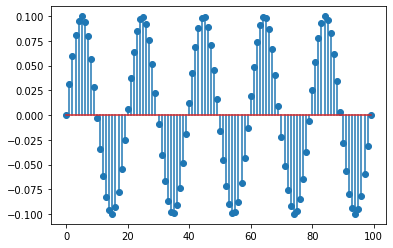

In [ ]:
t=nm.linspace(0,5,100)
wave= 0.1 * nm.sin(2*nm.pi*t)
plt.stem(wave)

<ipython-input-24-db488ee433d0>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ramp)


<StemContainer object of 3 artists>

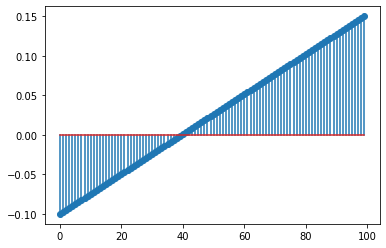

In [ ]:
ramp= 0.05*t-0.1
plt.stem(ramp)

<ipython-input-25-9552fd901883>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(wave_plus_ramp)


<StemContainer object of 3 artists>

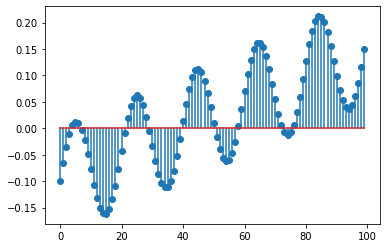

In [ ]:
wave_plus_ramp= wave+ramp
plt.stem(wave_plus_ramp)

<ipython-input-27-0ea7096b423d>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(low_pass_filtering(wave_plus_ramp,20))


<StemContainer object of 3 artists>

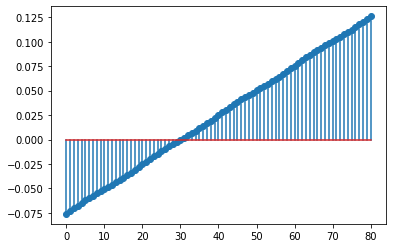

In [ ]:
def low_pass_filtering(x,w):
  low_pass_filtered=[1/w]*w
  output=nm.convolve(x,low_pass_filtered,'valid')
  return output

plt.stem(low_pass_filtering(wave_plus_ramp,20))

Meaning of [1/w]*w: It is done so that we get w number of samples of value 1/w

#Task 6

Task Explanation: The applied mechanism is similar to the fifth task, however the high pass filter only accepts high passing frequency and discards the lower one. So when we have passed our newly formed frequency into the high pass filter, only the higher frequency one(our original input) comes as output removing the  impulse response signal.

<ipython-input-28-f323fc6e20ac>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(high_pass_filtering(wave_plus_ramp,15))


<StemContainer object of 3 artists>

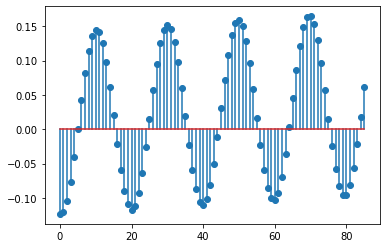

In [ ]:
def high_pass_filtering(x,w):
  high_pass_filter=[-1/w]*w
  high_pass_filter[0]=1-high_pass_filter[0]
  return nm.convolve(x,high_pass_filter, 'valid')

plt.stem(high_pass_filtering(wave_plus_ramp,15))
